## **TV Shows and Movies listed on Netflix** <br>
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

#### Let's load the data

#### The dataset has 7787 rows and 12 columns:
* show_id: unique id of each show (not much of a use for us in this notebook)
* type: The category of a show, can be either a Movie or a TV Show
* title: Name of the show
* director: Name of the director(s) of the show
* cast: Name of actors and other cast of the show
* country: Name of countries the show is available to watch on Netflix
* date_added: Date when the show was added on Netflix
* release_year: Release year of the show
* rating: Show rating on netflix
* duration: Time duration of the show
* listed_in: Genre of the show
* description: Some text describing the show

In [2]:
main_df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### Display a graph of missing values

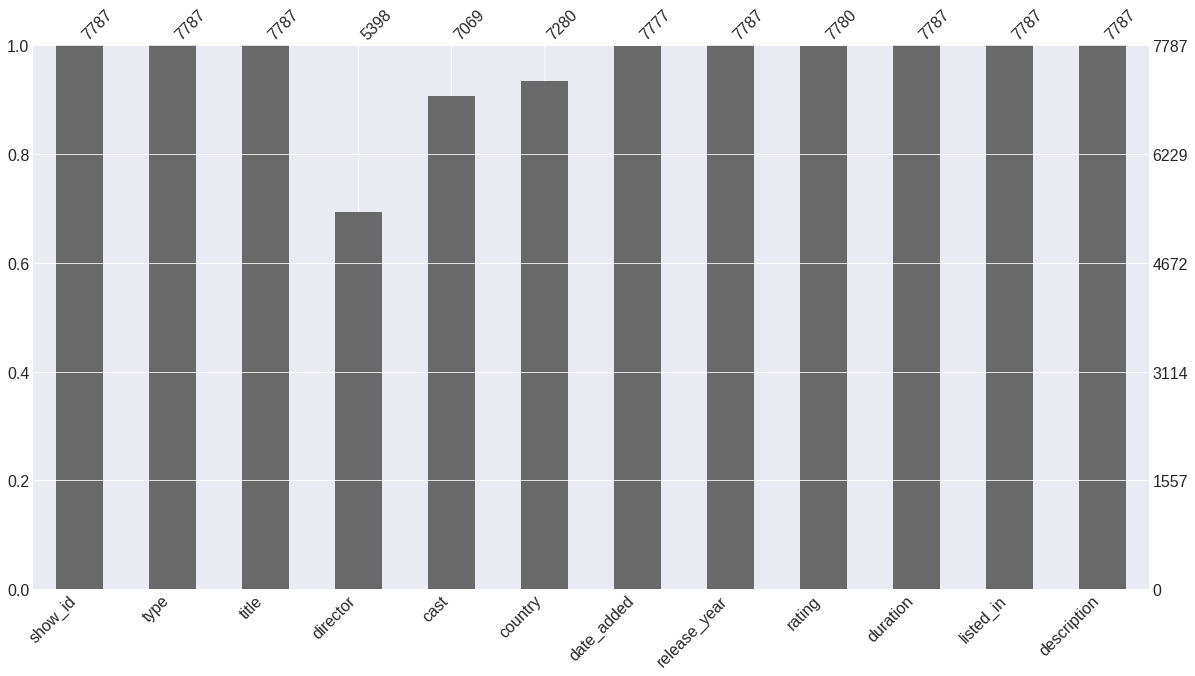

In [3]:
msno.bar(main_df, figsize=(20,10))
plt.show()

##### As we can see, the missing values are found only in columns "director", "cast", "country"

#### Display descriptions of the values in the columns

In [4]:
main_df.describe(include=[np.number])

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
main_df.describe(include=[np.object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s2593,Movie,Club Friday To Be Continued - The Promise,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Displaying a graph of the amount of content by country

In [7]:
countries = main_df['country'].value_counts()[main_df['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

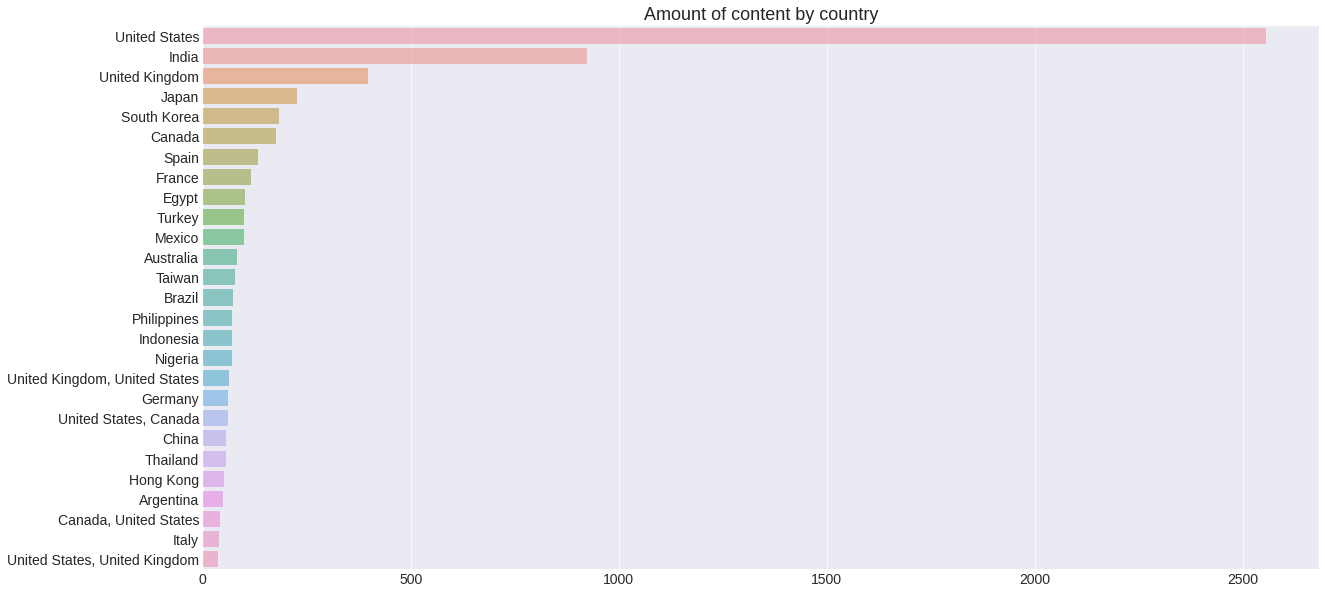

In [8]:
plt.figure(figsize=(20,10))
plt.title('Amount of content by country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

In [9]:
plt.figure(figsize=(14, 7))

figure = px.pie(countries.sort_values(ascending=False).iloc[:20], values=countries.values, names=countries.index,
                title='Content quantity by country in percentage', color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

<Figure size 1008x504 with 0 Axes>

##### The largest amount of content is concentrated in the US, because the film industry is highly developed in the US and Netflix is an American company

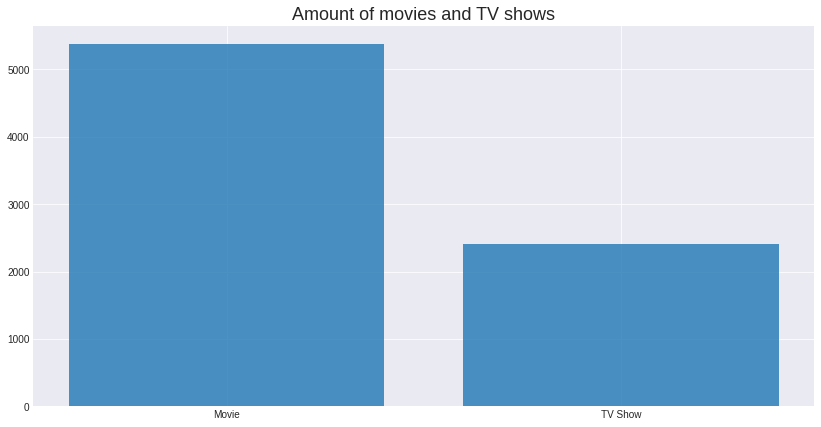

In [10]:
content_type = main_df['type'].value_counts()


plt.figure(figsize=(14, 7))

plt.bar(content_type.index, content_type.values, alpha=0.8)
plt.title('Amount of movies and TV shows', fontsize=18)
plt.show()

##### There are 5377 Movies and 2410 TV Shows available on Netflix all across the world.

In [11]:
TVshows = main_df[main_df['type'] == 'TV Show']
Movie = main_df[main_df['type'] == 'Movie']

In [12]:
TVshows_progress = TVshows['release_year'].value_counts().sort_index()
Movie_progress = Movie['release_year'].value_counts().sort_index()

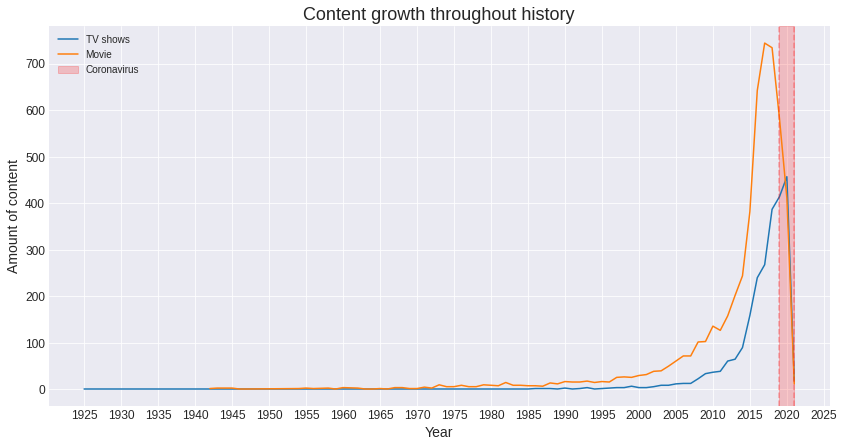

In [13]:
plt.figure(figsize=(14, 7))

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.axvline(2019, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2019, 2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(1925, 2026, 5)), fontsize=12)
plt.title('Content growth throughout history', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

##### As we can see the amount of content grew before the coronavirus period, during this period everything dropped sharply.

In [14]:
main_df.dropna(inplace=True)

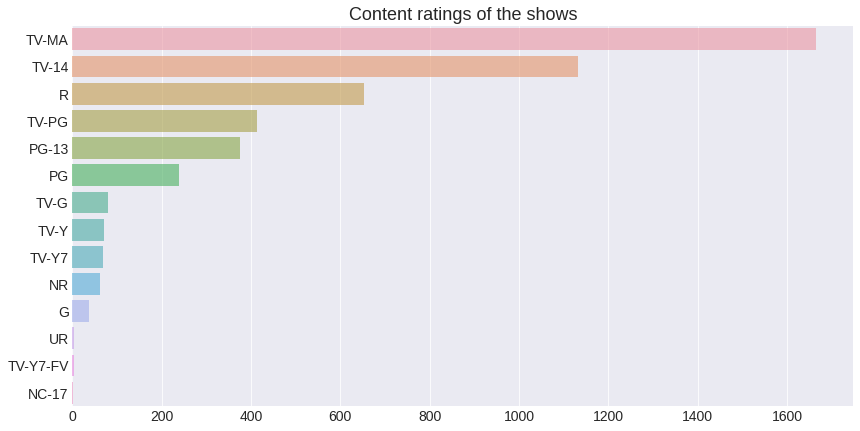

In [15]:
rating = main_df['rating'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Content ratings of the shows', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=rating.index, x=rating.values, alpha=0.6)

plt.show()

##### The largest count of shows are made with the 'TV-MA' rating (2863 shows) "TV-MA": For mature audiences only.

##### Second largest is the 'TV-14' rating (1931 shows) "TV-14": May be inappropriate for children younger than 14 years of age.

##### Third largest is the 'TV-PG' rating (806 shows) "TV-PG": Parental guidance suggested

##### Fourth largest is the very popular 'R' rating (665 shows) "R": May be unsuitable for children under the age of 17 (Under 17 requires accompanying parent or adult guardian")

In [16]:
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



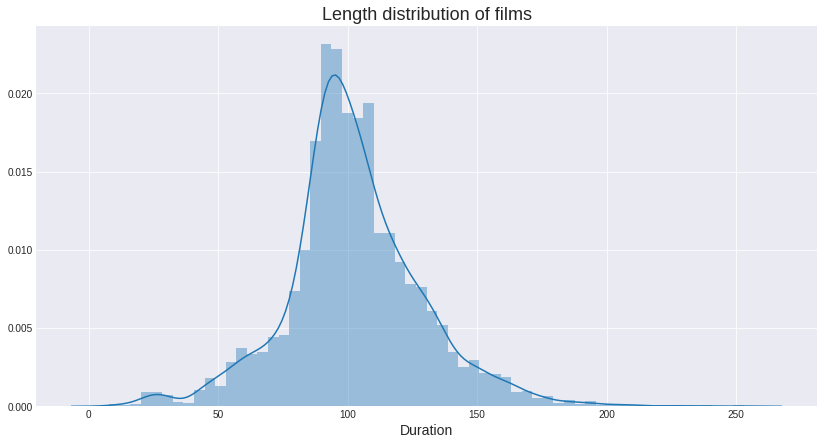

In [17]:
grp = main_df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]

plt.figure(figsize=(14, 7))

sns.distplot(movie['duration'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

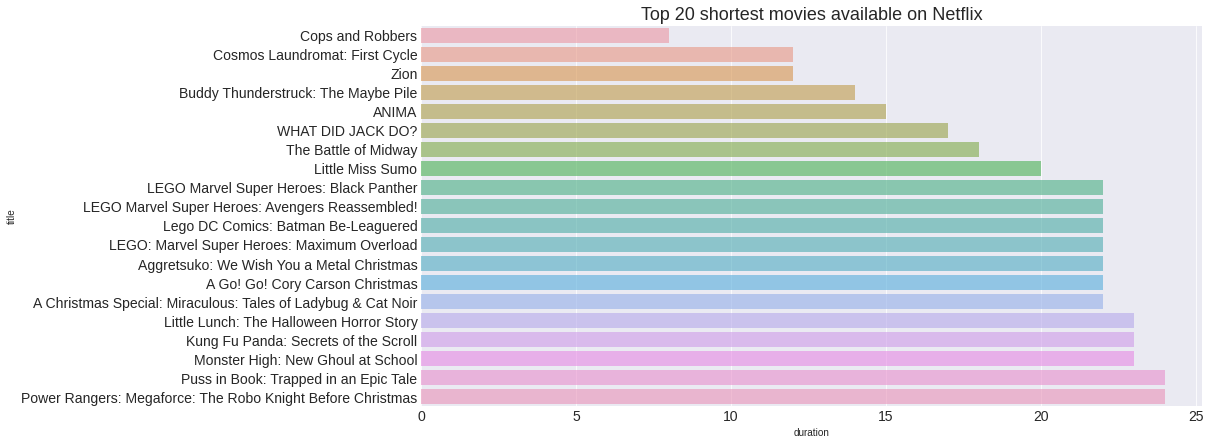

In [18]:
short = movie.sort_values('duration')[['title', 'duration']].iloc[:20]

plt.figure(figsize=(14,7))
plt.title('Top 20 shortest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=short['title'], x=short['duration'], alpha=0.6)

plt.show()

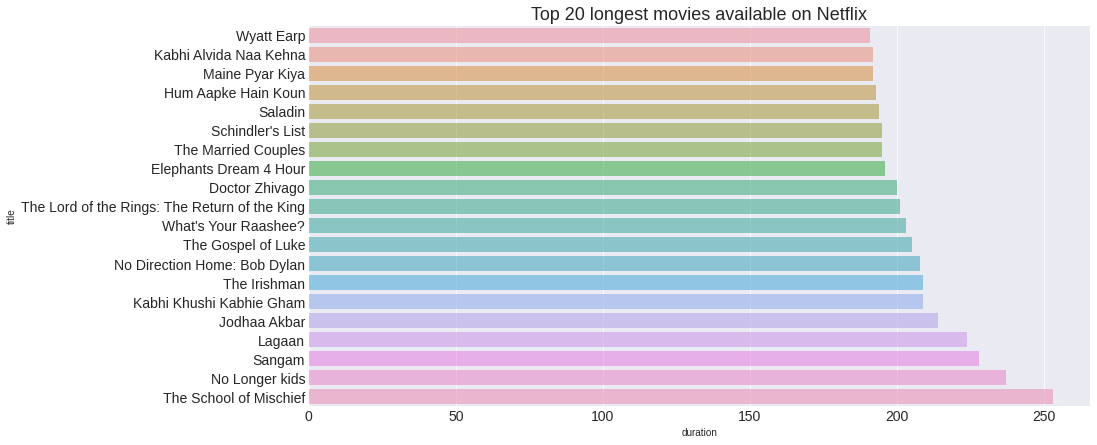

In [19]:
long = movie.sort_values('duration')[['title', 'duration']].iloc[-20:]

plt.figure(figsize=(14,7))
plt.title('Top 20 longest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'], alpha=0.6)

plt.show()

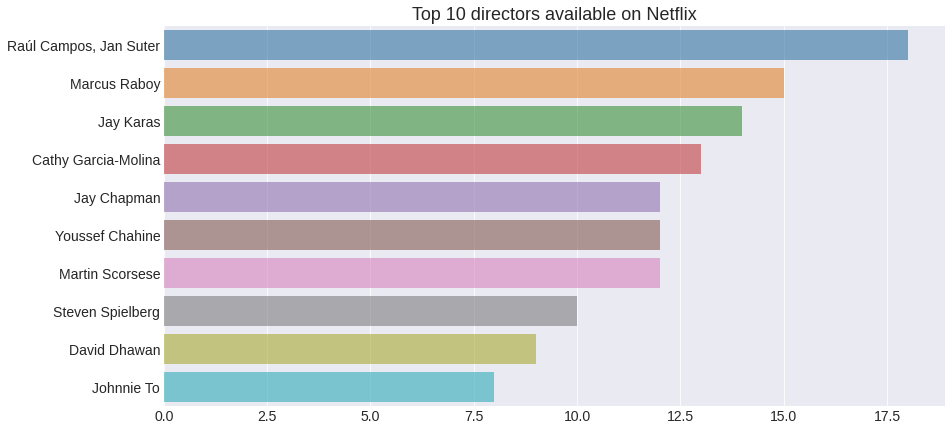

In [20]:
directors = main_df['director'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Top 10 directors available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=directors.index[:10], x=directors.values[:10], alpha=0.6)

plt.show()